# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [38]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
if not os.path.exists("100zloty.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
hajs = cv2.imread('100zloty.jpg', cv2.IMREAD_COLOR)

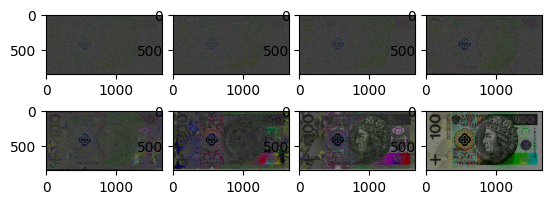

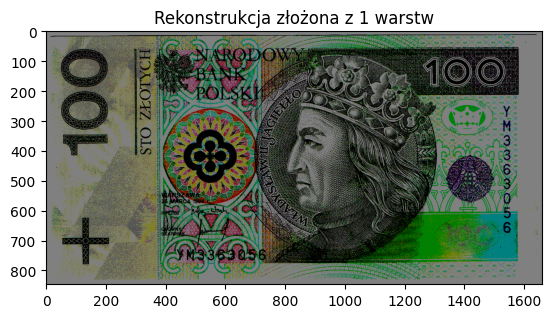

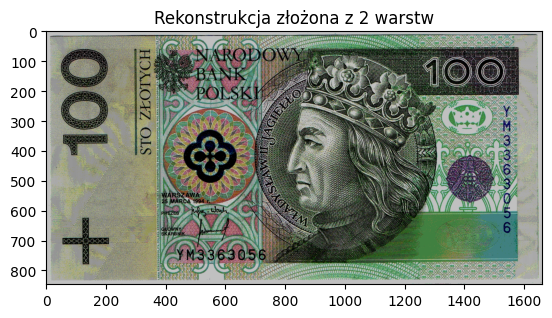

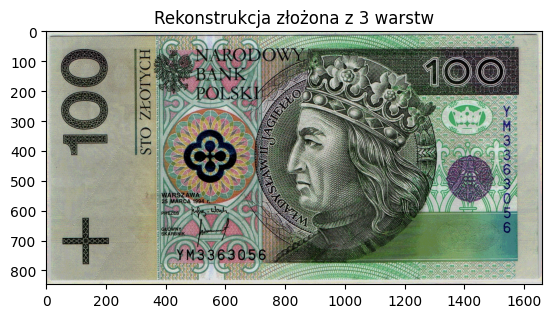

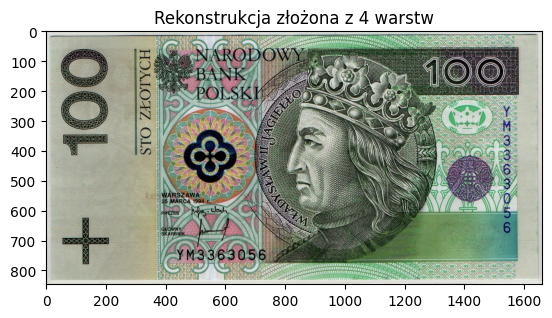

In [49]:
shape = tuple([8] + list(hajs.shape))
hajs1 = np.ndarray(shape).astype('uint8')
fig = plt.figure()
for i in range(8):
    hajs1[i] = (hajs[:, :, :] & 1 << i )
    ax = fig.add_subplot(4, 8, (2*i+1, 2*i+2))
    ax.imshow(hajs1[i]*(1<<(7-i)))

reconsrtuction_depth = 4
shapefin = tuple([reconsrtuction_depth] + list(hajs.shape))
hajsfin = np.ndarray(shapefin).astype('uint8')

for j in range(reconsrtuction_depth):
    for i in range(j+1):
        hajsfin[j] += (hajs1[7-i][:, :, :])
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.imshow(hajsfin[j])
    ax.set_title("Rekonstrukcja złożona z " + str(j+1) + " warstw")
    



Głebokość rekosntrukcji zwiększa dokładność odwzorowania